In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, acf, pacf
from arch import arch_model

##### Đọc, xử lý dữ liệu

In [2]:
data = pd.read_csv('../data/NTDOY-months.csv')

In [3]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

In [4]:
data['LogReturn'] = np.log(data['Adj Close'] / data['Adj Close'].shift(1)).dropna()

In [5]:
data['Adj_Close_Diff'] = data['Adj Close'].diff()

##### Chia train-test

In [6]:
data = data.dropna() 

In [7]:
# Xác định chỉ số cắt để chia tập train và test
train_size = int(len(data) * 0.9)  # 80% cho train, 20% cho test

# Chia tập dữ liệu
train_data = data.iloc[:train_size].dropna()
test_data = data.iloc[train_size:].dropna()

# Kiểm tra kích thước của các tập
print("Kích thước tập train:", train_data.shape)
print("Kích thước tập test:", test_data.shape)

Kích thước tập train: (117, 8)
Kích thước tập test: (13, 8)


In [8]:
model = arch_model(train_data['LogReturn'], vol='ARCH', q=1)
results_1 = model.fit()

Iteration:      1,   Func. Count:      5,   Neg. LLF: -41.589870141067365
Iteration:      2,   Func. Count:     12,   Neg. LLF: 19260.018807525532
Iteration:      3,   Func. Count:     20,   Neg. LLF: -123.90830112953446
Iteration:      4,   Func. Count:     24,   Neg. LLF: -123.90730997428614
Iteration:      5,   Func. Count:     29,   Neg. LLF: -123.93332489305249
Iteration:      6,   Func. Count:     33,   Neg. LLF: -123.9336087449341
Iteration:      7,   Func. Count:     37,   Neg. LLF: -123.93366129493963
Iteration:      8,   Func. Count:     41,   Neg. LLF: -123.93366223415579
Optimization terminated successfully    (Exit mode 0)
            Current function value: -123.93366223415579
            Iterations: 8
            Function evaluations: 41
            Gradient evaluations: 8


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.007038. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [9]:
print(results_1.summary())


                      Constant Mean - ARCH Model Results                      
Dep. Variable:              LogReturn   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:                123.934
Distribution:                  Normal   AIC:                          -241.867
Method:            Maximum Likelihood   BIC:                          -233.581
                                        No. Observations:                  117
Date:                Tue, Nov 19 2024   Df Residuals:                      116
Time:                        15:44:52   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         9.4465e-03  7.988e-03      1.183      0.237 

In [10]:
forecast = results_1.forecast(horizon=5)
print(forecast.variance)

                                h.1       h.2       h.3       h.4       h.5
Date                                                                       
2023-10-31 00:00:00+00:00  0.007021  0.007038  0.007038  0.007038  0.007038


In [11]:
from statsmodels.tsa.stattools import adfuller, kpss

# ADF Test
result_adf = adfuller(data['LogReturn'].dropna())
print('ADF Statistic:', result_adf[0])
print('p-value:', result_adf[1])

# KPSS Test
from statsmodels.tsa.stattools import kpss
result_kpss, _, _, _ = kpss(data['LogReturn'].dropna(), regression='c')
print('KPSS Statistic:', result_kpss)


ADF Statistic: -9.191089378199424
p-value: 2.1223796887904274e-15
KPSS Statistic: 0.08493551755616072


C:\Users\admin\AppData\Local\Temp\ipykernel_14744\2423372450.py:10: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result_kpss, _, _, _ = kpss(data['LogReturn'].dropna(), regression='c')


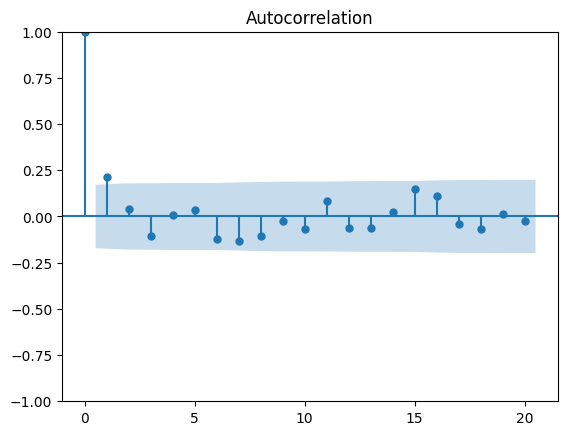

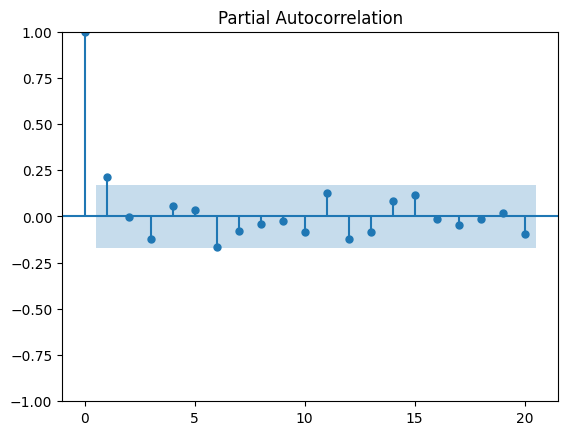

In [12]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plot_acf(data['LogReturn'].dropna(), lags=20)
plt.show()

plot_pacf(data['LogReturn'].dropna(), lags=20)
plt.show()


In [13]:
from statsmodels.stats.diagnostic import het_arch

arch_test = het_arch(data['LogReturn'].dropna())
print('LM Statistic:', arch_test[0])
print('p-value:', arch_test[1])


LM Statistic: 3.1270105968101047
p-value: 0.9782749625241096


In [14]:
import scipy.stats as stats

# Shapiro-Wilk Test
stat, p = stats.shapiro(data['LogReturn'].dropna())
print('Shapiro-Wilk Test Statistic:', stat)
print('p-value:', p)


Shapiro-Wilk Test Statistic: 0.9364405187475923
p-value: 1.1829444514044361e-05


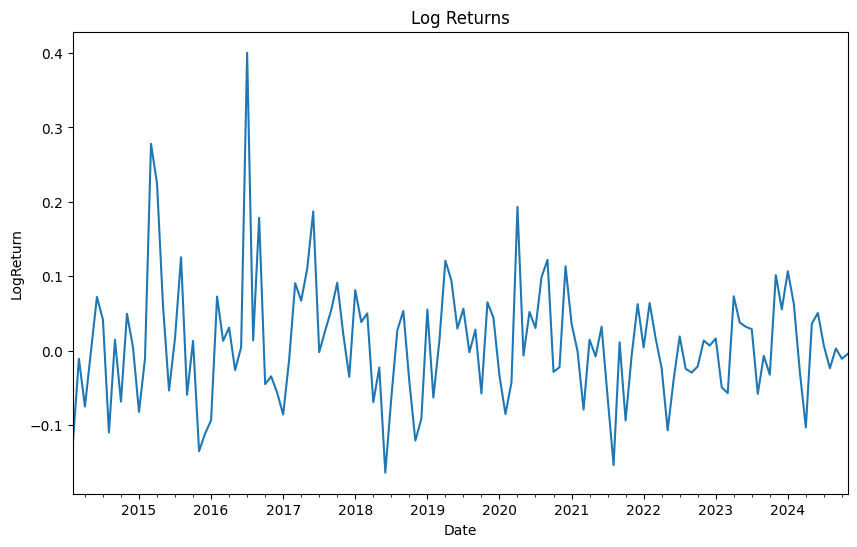

In [15]:
data['LogReturn'].dropna().plot(figsize=(10, 6), title='Log Returns', ylabel='LogReturn')
plt.show()


                          Zero Mean - GARCH Model Results                           
Dep. Variable:                    LogReturn   R-squared:                       0.000
Mean Model:                       Zero Mean   Adj. R-squared:                  0.008
Vol Model:                            GARCH   Log-Likelihood:                152.866
Distribution:      Standardized Student's t   AIC:                          -297.732
Method:                  Maximum Likelihood   BIC:                          -286.262
                                              No. Observations:                  130
Date:                      Tue, Nov 19 2024   Df Residuals:                      130
Time:                              15:50:27   Df Model:                            0
                               Volatility Model                              
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
o

c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.006651. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


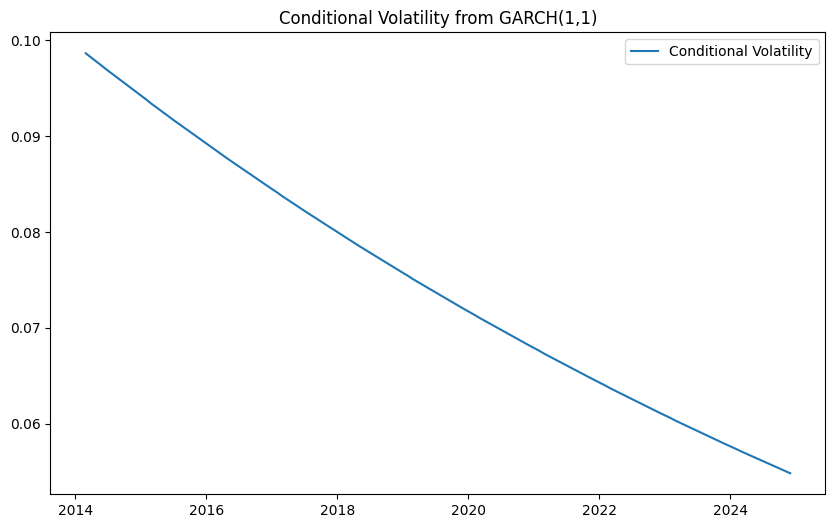

In [18]:
model = arch_model(data['LogReturn'], vol='Garch', p=1, q=1, mean='Zero', dist='t')

# Fit mô hình
garch_fit = model.fit(disp='off')
print(garch_fit.summary())

# Dự đoán phương sai có điều kiện
garch_forecast = garch_fit.forecast(horizon=10)  # Dự báo 10 bước

# Vẽ phương sai có điều kiện
plt.figure(figsize=(10, 6))
plt.plot(garch_fit.conditional_volatility, label='Conditional Volatility')
plt.title('Conditional Volatility from GARCH(1,1)')
plt.legend()
plt.show()

In [19]:
from statsmodels.stats.diagnostic import het_arch

test_stat, p_value, _, _ = het_arch(data['LogReturn'].dropna())
print(f"ARCH Test Statistic: {test_stat}")
print(f"p-value: {p_value}")


ARCH Test Statistic: 3.1270105968101047
p-value: 0.9782749625241096


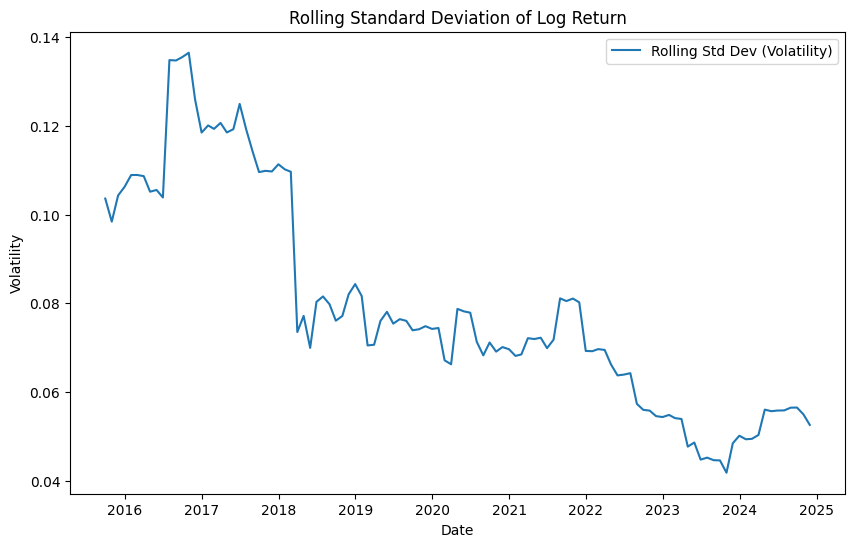

In [20]:
rolling_std = data['LogReturn'].rolling(window=20).std()

plt.figure(figsize=(10, 6))
plt.plot(rolling_std, label='Rolling Std Dev (Volatility)')
plt.title('Rolling Standard Deviation of Log Return')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()


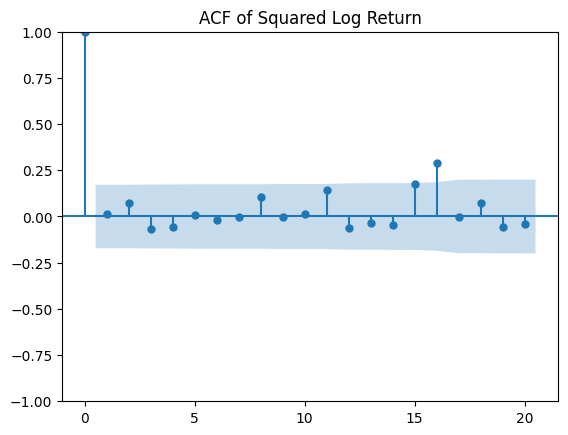

In [23]:
from statsmodels.graphics.tsaplots import plot_acf

squared_logreturn = data['LogReturn'] ** 2
plot_acf(squared_logreturn.dropna(), lags=20, title='ACF of Squared Log Return')
plt.show()


In [24]:
from statsmodels.stats.diagnostic import het_arch

test_stat, p_value, _, _ = het_arch(data['LogReturn'].dropna())
print(f"ARCH Test Statistic: {test_stat}")
print(f"p-value: {p_value}")


ARCH Test Statistic: 3.1270105968101047
p-value: 0.9782749625241096


In [25]:
from statsmodels.tsa.stattools import adfuller

adf_stat, p_value, _, _, _, _ = adfuller(data['LogReturn'].dropna())
print(f"ADF Statistic: {adf_stat}")
print(f"p-value: {p_value}")


ADF Statistic: -9.191089378199424
p-value: 2.1223796887904274e-15


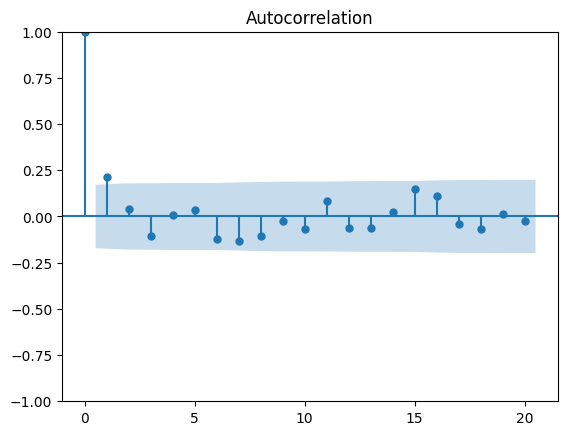

In [26]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(data['LogReturn'].dropna(), lags=20)
plt.show()


In [37]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import acf

# Giả sử bạn đã có data['LogReturn']
# data = pd.read_csv('your_data.csv')  # Nếu dữ liệu nằm trong file CSV

# Tính toán hệ số tự tương quan cho LogReturn với các độ trễ
log_returns = data['LogReturn']
acf_values, confint = acf(log_returns, nlags=10, alpha=0.05)  # Tính ACF đến 10 độ trễ

# Box-Ljung test thủ công
T = len(log_returns)  # Số điểm dữ liệu
m = 10  # Độ trễ tối đa
q_stat = 0  # Giá trị thống kê kiểm định Q

# Tính toán thống kê kiểm định Box-Ljung
for k in range(1, m + 1):
    r_k = acf_values[k]  # Hệ số tự tương quan tại độ trễ k
    q_stat += (T * (T + 2) * r_k**2) / (T - k)

# Tính p-value sử dụng phân phối chi-square với m bậc tự do
p_value = 1 - stats.chi2.cdf(q_stat, m)

# In kết quả kiểm định Box-Ljung
print("--- Kiểm định Box-Ljung ---")
print(f"Statistic: {q_stat:.4f}")
print(f"p-value: {p_value:.4f}")


--- Kiểm định Box-Ljung ---
Statistic: 14.6707
p-value: 0.1445


In [40]:
import pandas as pd
from statsmodels.stats.diagnostic import acorr_ljungbox

# Giả sử bạn đã có data['LogReturn']
# data = pd.read_csv('your_data.csv')  # Nếu dữ liệu nằm trong file CSV

# Kiểm định Box-Ljung (kiểm định với 10 độ trễ)
lb_result = acorr_ljungbox(data['LogReturn'], lags=10)

# Kiểm tra kiểu dữ liệu trả về
print(lb_result)

# In kết quả kiểm định Box-Ljung
print("--- Kiểm định Box-Ljung ---")
print(f"{'Lag':<5} {'Statistic':<20} {'p-value':<20}")
print("-" * 50)

# In kết quả cho mỗi độ trễ
for lag in range(10):
    stat = lb_result['lb_stat'].iloc[lag]  # Sử dụng .iloc để truy cập bằng chỉ số
    p_value = lb_result['lb_pvalue'].iloc[lag]  # Sử dụng .iloc để truy cập bằng chỉ số
    print(f"{lag + 1:<5} {stat:<20.4f} {p_value:<20.4f}")


      lb_stat  lb_pvalue
1    5.949000   0.014726
2    6.196932   0.045118
3    7.756984   0.051310
4    7.760887   0.100740
5    7.943336   0.159386
6    9.984104   0.125323
7   12.482125   0.085778
8   13.980723   0.082269
9   14.056846   0.120317
10  14.670713   0.144536
--- Kiểm định Box-Ljung ---
Lag   Statistic            p-value             
--------------------------------------------------
1     5.9490               0.0147              
2     6.1969               0.0451              
3     7.7570               0.0513              
4     7.7609               0.1007              
5     7.9433               0.1594              
6     9.9841               0.1253              
7     12.4821              0.0858              
8     13.9807              0.0823              
9     14.0568              0.1203              
10    14.6707              0.1445              
